**EDA - Group 4**

# **Step 1: Import Libraries and Load Dataset**


In [73]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
import pandas as pd
import requests

# Use the raw URL to the file
url = 'https://raw.githubusercontent.com/BjoernHartig/data/main/housing_in_london_yearly_variables.csv'
response = requests.get(url)

# Save the file to your local filesystem
with open('housing_in_london_yearly_variables.csv', 'wb') as file:
    file.write(response.content)

# Now you can read it using pandas
df = pd.read_csv('housing_in_london_yearly_variables.csv')


# mount the gdrive
# from google.colab import drive
# drive.mount("/content/gdrive")

# df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Exploratory_Data_Analysis/Dataset/housing_in_london_yearly_variables.csv")



In [74]:
df.head()  # Display the first few rows

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1


# **2. Data Preprocessing**

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               1071 non-null   object 
 1   area               1071 non-null   object 
 2   date               1071 non-null   object 
 3   median_salary      1049 non-null   float64
 4   life_satisfaction  352 non-null    float64
 5   mean_salary        1071 non-null   object 
 6   recycling_pct      860 non-null    object 
 7   population_size    1018 non-null   float64
 8   number_of_jobs     931 non-null    float64
 9   area_size          666 non-null    float64
 10  no_of_houses       666 non-null    float64
 11  borough_flag       1071 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 100.5+ KB


In [76]:
# number of missing values in each column
df.isnull().sum()


code                   0
area                   0
date                   0
median_salary         22
life_satisfaction    719
mean_salary            0
recycling_pct        211
population_size       53
number_of_jobs       140
area_size            405
no_of_houses         405
borough_flag           0
dtype: int64

This heatmap visualizes missing data across the dataset to identify gaps and patterns. Using df.isnull(), it maps missing (True) and non-missing (False) values, which are displayed with Seaborn’s heatmap in a readable figure. The "viridis" color map provides clear contrast, while cbar=False hides the color bar for simplicity. This visualization is a crucial step in EDA, helping to identify any systematic missingness and inform necessary preprocessing actions, such as data imputation or removal of incomplete rows.

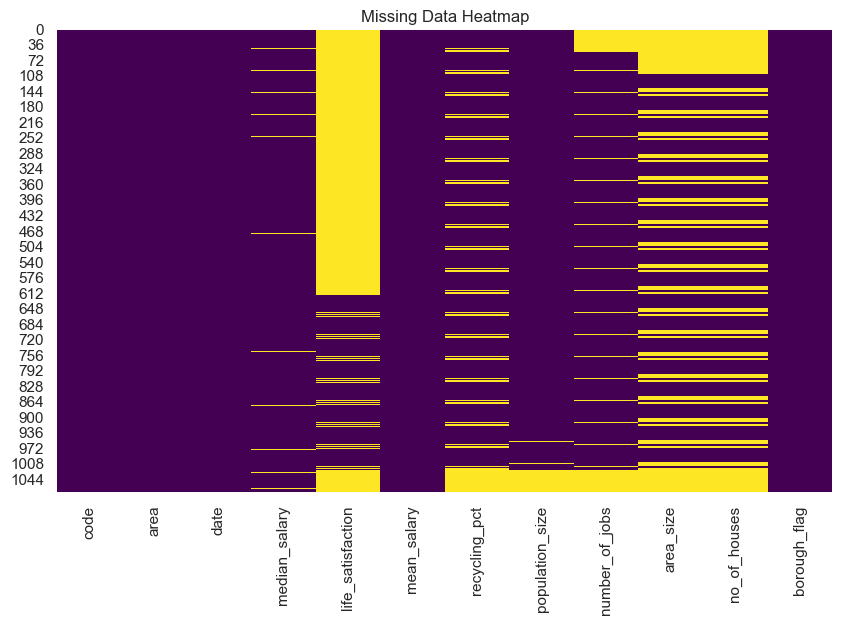

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
# Missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

**Handling Missing Values:**


This code segment converts the columns 'mean_salary' and 'recycling_pct' in the DataFrame df to numeric data types using the pd.to_numeric() function. The parameter errors='coerce' ensures that any non-numeric values present in these columns are replaced with NaN (Not a Number) instead of raising an error. This step is essential for preparing the data for analysis, as it ensures that the numeric columns contain only valid numerical values, allowing for accurate computations and model training.


In [78]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Convert 'mean_salary' and 'recycling_pct' to numeric, replacing non-numeric values with NaN
df['mean_salary'] = pd.to_numeric(df['mean_salary'], errors='coerce')
df['recycling_pct'] = pd.to_numeric(df['recycling_pct'], errors='coerce')

In [79]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

# Apply mean imputation for numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Apply mode imputation for categorical columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Display updated DataFrame
df

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,7.485057,48922.0,0.00000,6.581000e+03,3.188095e+06,372490.27027,881468.15015,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,7.485057,23620.0,3.00000,1.624440e+05,3.188095e+06,372490.27027,881468.15015,1
2,E09000003,barnet,1999-12-01,19568.0,7.485057,23128.0,8.00000,3.134690e+05,3.188095e+06,372490.27027,881468.15015,1
3,E09000004,bexley,1999-12-01,18621.0,7.485057,21386.0,18.00000,2.174580e+05,3.188095e+06,372490.27027,881468.15015,1
4,E09000005,brent,1999-12-01,18532.0,7.485057,20911.0,6.00000,2.603170e+05,3.188095e+06,372490.27027,881468.15015,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,K03000001,great britain,2019-12-01,30446.0,7.485057,37603.0,26.89057,6.042576e+06,3.188095e+06,372490.27027,881468.15015,0
1067,K04000001,england and wales,2019-12-01,30500.0,7.485057,37865.0,26.89057,6.042576e+06,3.188095e+06,372490.27027,881468.15015,0
1068,N92000002,northern ireland,2019-12-01,27434.0,7.485057,32083.0,26.89057,6.042576e+06,3.188095e+06,372490.27027,881468.15015,0
1069,S92000003,scotland,2019-12-01,30000.0,7.485057,34916.0,26.89057,6.042576e+06,3.188095e+06,372490.27027,881468.15015,0


In [80]:
# number of missing values in each column
df.isnull().sum()

code                 0
area                 0
date                 0
median_salary        0
life_satisfaction    0
mean_salary          0
recycling_pct        0
population_size      0
number_of_jobs       0
area_size            0
no_of_houses         0
borough_flag         0
dtype: int64

In [81]:
numeric_cols_names = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:")
print(numeric_cols_names)

# Get names of categorical columns
categorical_cols_names = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:")
print(categorical_cols_names)

Numeric Columns:
['median_salary', 'life_satisfaction', 'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs', 'area_size', 'no_of_houses', 'borough_flag']

Categorical Columns:
['code', 'area', 'date']


we generate boxplots for each numeric column to visually inspect their distributions and identify potential outliers. The axes are flattened to simplify indexing, so each numeric column can be plotted using sns.boxplot within a loop. Each subplot is labeled with the column name for clarity. Unused subplots are hidden to avoid empty spaces. This layout and visualization help quickly assess the spread and presence of any outliers in each numeric column.

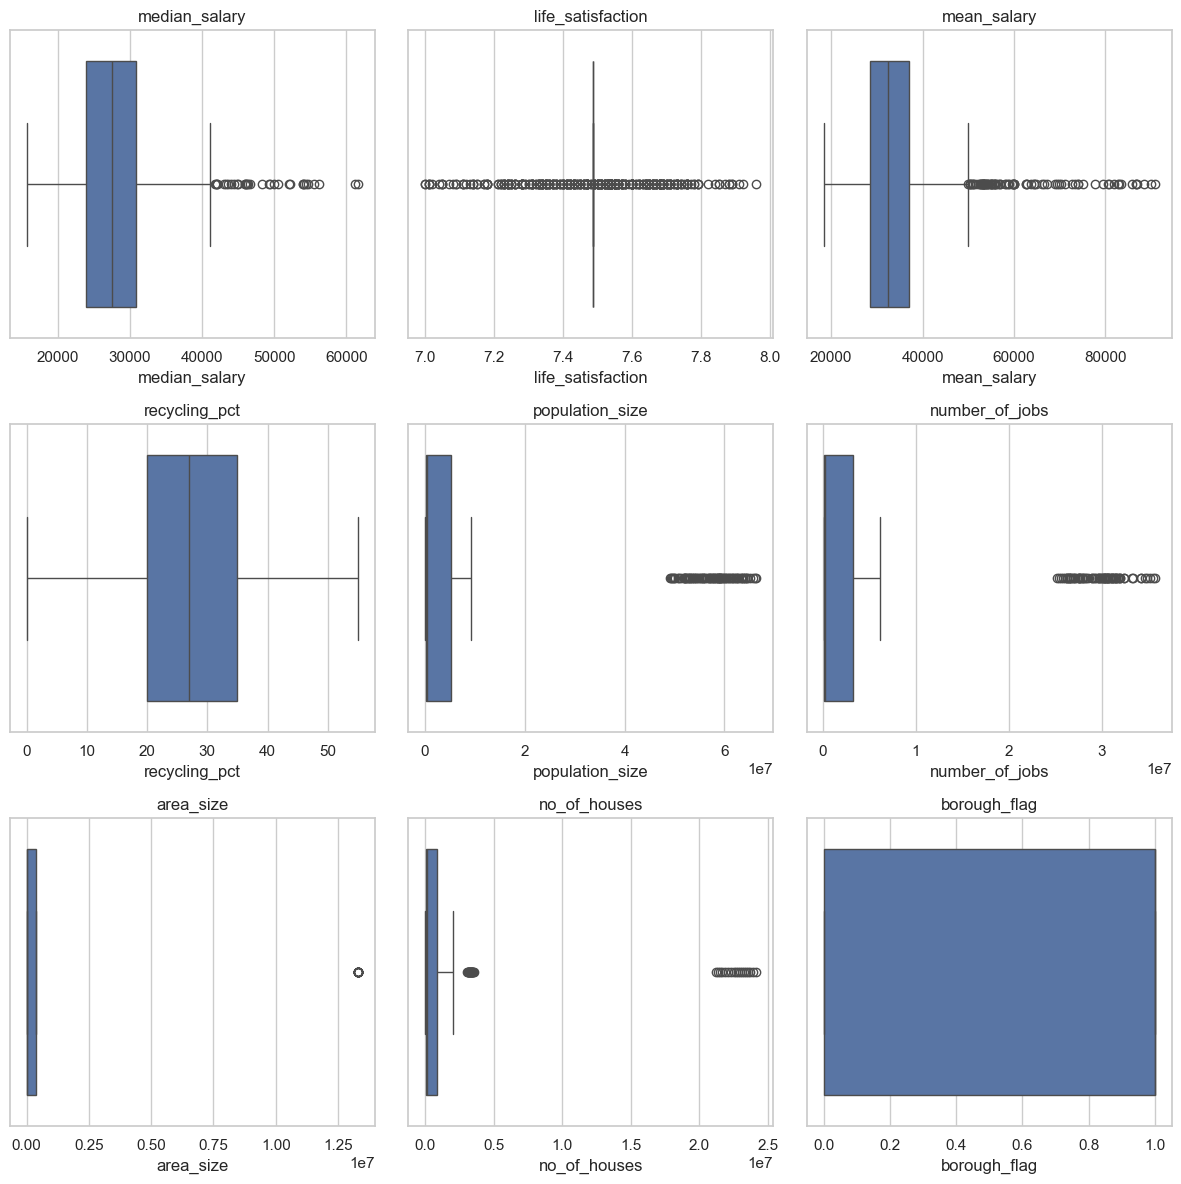

In [82]:
# Create subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 12))  # Adjusted figsize for better layout

sns.set_theme(style="whitegrid")

# Flatten the 2D array of axes for easy indexing
ax = ax.flatten()

# Plotting
for axid, col in enumerate(numeric_cols_names):
    sns.boxplot(x=df[col], ax=ax[axid])
    ax[axid].set_title(col)  # Set title for each subplot

# Hide any unused subplots
for i in range(len(numeric_cols_names), len(ax)):
    ax[i].axis('off')  # Turn off any unused axes

plt.tight_layout()
plt.show()

This function removes outliers from specified columns in the DataFrame based on the Interquartile Range (IQR) method. For each column, it calculates the first (Q1) and third (Q3) quartiles, computes the IQR (Q3 - Q1), and sets the lower and upper bounds as 𝑄 1 − 1.5 × 𝐼 𝑄 𝑅 and 𝑄 3 + 1.5 × 𝐼 𝑄 𝑅, respectively. The DataFrame is then filtered to retain only values within these bounds, effectively removing rows with outliers. The function prints the shape of the original and cleaned DataFrame, showing the impact of outlier removal. This approach is useful for reducing the influence of extreme values on analyses or model training.

In [83]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
print("Original DataFrame shape: ", df.shape[0],"x", df.shape[1])
print(df)
# Remove outliers
df = remove_outliers(df, numeric_cols_names)


print("\nCleaned DataFrame without outliers:b ", df.shape[0],"x", df.shape[1])
print(df)

Original DataFrame shape:  1071 x 12
           code                  area        date  median_salary  \
0     E09000001        city of london  1999-12-01        33020.0   
1     E09000002  barking and dagenham  1999-12-01        21480.0   
2     E09000003                barnet  1999-12-01        19568.0   
3     E09000004                bexley  1999-12-01        18621.0   
4     E09000005                 brent  1999-12-01        18532.0   
...         ...                   ...         ...            ...   
1066  K03000001         great britain  2019-12-01        30446.0   
1067  K04000001     england and wales  2019-12-01        30500.0   
1068  N92000002      northern ireland  2019-12-01        27434.0   
1069  S92000003              scotland  2019-12-01        30000.0   
1070  W92000004                 wales  2019-12-01        27500.0   

      life_satisfaction  mean_salary  recycling_pct  population_size  \
0              7.485057      48922.0        0.00000     6.581000e+03   
1 

We now create pie charts for the distributions of up to three categorical columns, giving a visual breakdown of each category’s proportions.

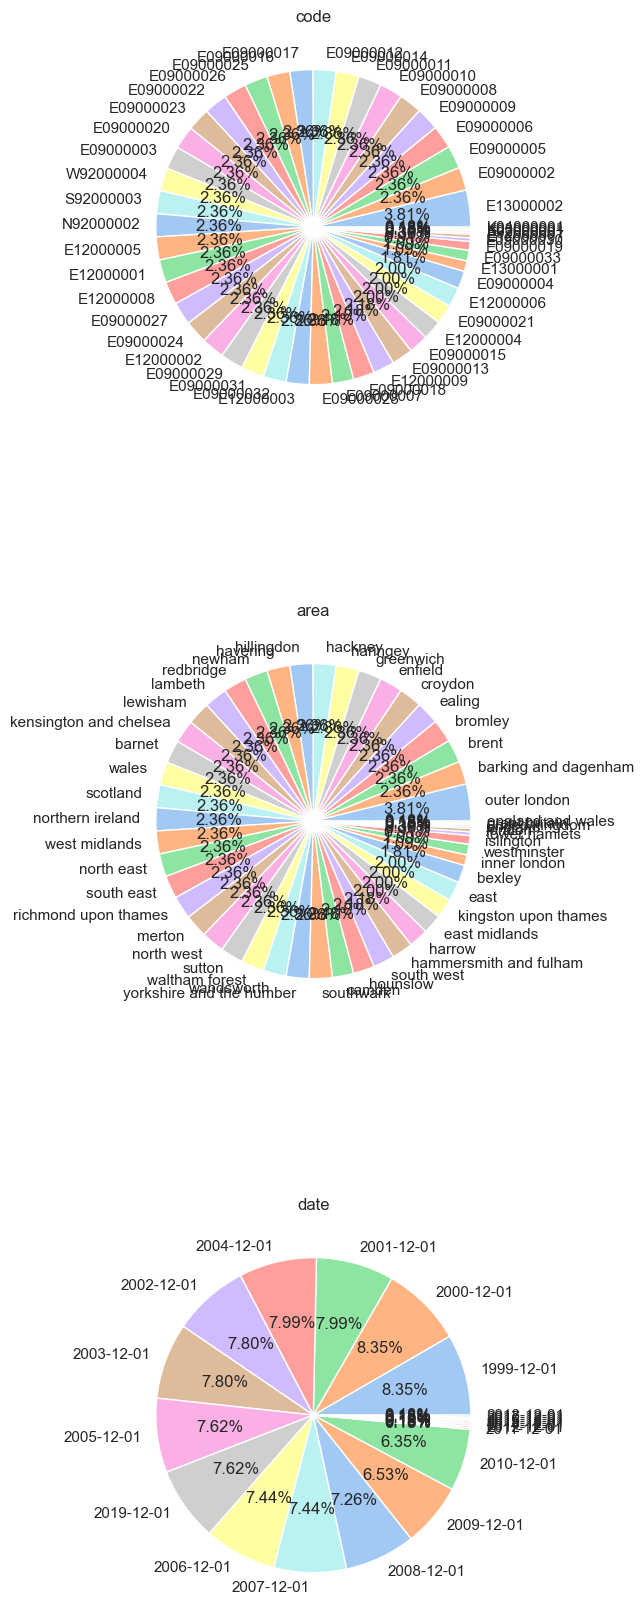

In [84]:
# Assuming df and categorical_cols_names are already defined
fig, ax = plt.subplots(3, 1, figsize=(6, 18))  # Adjusted for 3 rows, 1 column layout

# Plotting pie charts
for axid, col in enumerate(categorical_cols_names[:3]):  # Limit to 3 columns
    col_dist = df[col].value_counts()
    pie_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind='pie', colors=pie_colors, autopct='%1.2f%%', ax=ax[axid], ylabel='')  # Hide ylabel for clarity
    ax[axid].set_title(col)  # Set title for each subplot

plt.tight_layout()
plt.show()

In this code snippet, you preprocess categorical columns in your dataset. Since there are no ordinal variables, you focus on nominal variables, code and area. You apply One-Hot Encoding using ColumnTransformer and OneHotEncoder, setting drop='first' to prevent the dummy variable trap. The transformed data is then converted into a DataFrame with meaningful column names using get_feature_names_out(). This step is crucial for preparing the data for machine learning models, which require numerical input.

In [85]:
# Define the categorical columns
ordinal_col = ''  # Since there are no ordinal column
nominal_col = ['code', 'area']
# Step 1: Label Encoding for ordinal categorical variable
# le = LabelEncoder()
# df[ordinal_col] = le.fit_transform(df[ordinal_col])

# Step 2: One-Hot Encoding for nominal categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), nominal_col)
    ],
    remainder='passthrough'
)
# df = pd.get_dummies(df, columns=nominal_col, drop_first=True)
# Apply the transformer to the DataFrame
df_encoded = preprocessor.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded, columns=preprocessor.get_feature_names_out())


1.Chosen Target: *median_salary*
Reason for Selection:
You are trying to predict the median salary in different areas of London over time, which makes median_salary the natural target for a regression problem.
The idea is that other variables (such as population size, number of jobs, recycling percentage, etc.) could influence or correlate with the median salary in each area.

2.Excluded Features:
*code (area identifier) and borough_flag (binary indicator for boroughs)* were excluded because:
code is simply an identifier and doesn't provide any useful numerical or categorical information for predictions.
borough_flag is a binary variable, which could be included, but in this case, it is omitted as it may not provide additional useful information beyond what is captured in other features like area.

*no_of_houses* could potentially influence salary, but the decision to exclude it depends on the context. If there are too many missing values or if it has little variability, it might not be informative for the prediction.

In [86]:
# Define features and target
X = df.drop(columns=['median_salary', 'code', 'borough_flag', 'no_of_houses'])
y = df['median_salary']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

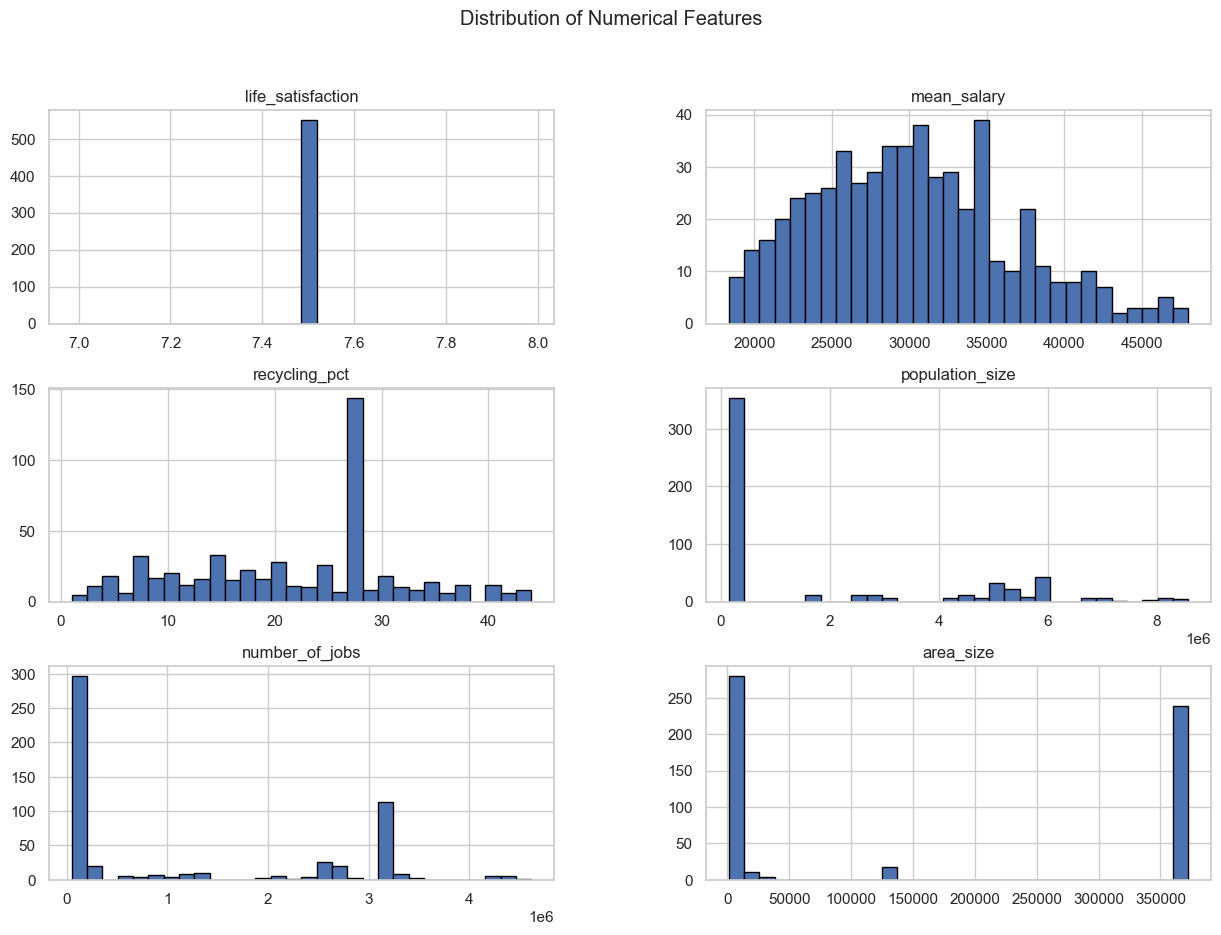

In [87]:
# Distribution of numerical features
df[numeric_features].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

In this code snippet, we calculate and visualize the correlation matrix of numeric columns in your dataset. First, we compute the correlation matrix using the .corr() method on the specified numeric columns. we then extract the absolute correlation values with respect to the target variable, median_salary, and sort them in descending order, allowing you to identify which features are most strongly correlated with the target.
Finally, we create a heatmap using Seaborn to visually represent the correlation matrix. The heatmap, enhanced with annotations, color coding, and a title, provides a clear view of the relationships between variables, facilitating the identification of potential predictors for modeling purposes.

median_salary        1.000000
mean_salary          0.920167
area_size            0.412129
recycling_pct        0.395627
borough_flag         0.352934
no_of_houses         0.232129
number_of_jobs       0.155817
population_size      0.073128
life_satisfaction         NaN
Name: median_salary, dtype: float64


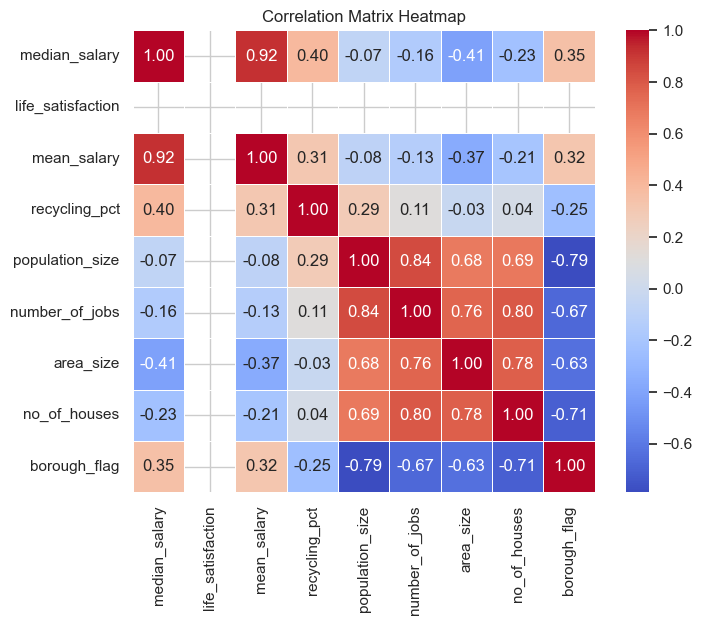

In [88]:
# Calculate the correlation matrix
correlation_matrix = df[numeric_cols_names].corr()

correlation_with_target = correlation_matrix['median_salary'].abs().sort_values(ascending=False)

# Display features with correlation with the target
print(correlation_with_target)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Feature selection is important because it improves model performance by removing irrelevant or redundant features, reduces overfitting by simplifying the model, and enhances interpretability by focusing on the most impactful variables. Additionally, it decreases training time and helps mitigate the curse of dimensionality in high-dimensional spaces. Overall, effective feature selection leads to more robust and efficient machine learning models.

In this code snippet, we implement recursive feature elimination (RFE) to select the most important features for predicting the target variable, median_salary.

After that, we create a linear regression model and apply RFE to select a specified number of top features (n_features_to_select). Finally, the selected features are displayed, providing insights into which variables are most impactful for predicting the median salary, aiding in model interpretability and performance.

In [89]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Load your dataset
X = df.drop('median_salary', axis=1)  # Features
y = df['median_salary']                # Target variable

# Check the data types of your features
print(X.dtypes)

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-Numeric Columns:", non_numeric_columns)

# Option 1: Drop non-numeric columns (if not needed)
X = X.drop(non_numeric_columns, axis=1)

# Option 2: Convert non-numeric columns (if needed)
# Uncomment below if you wish to use one-hot encoding for categorical features
# X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)

# Check for missing values
print("Missing Values in Features:\n", X.isnull().sum())

# Create a model
model = LinearRegression()

# Create RFE model and select top n features
n_features_to_select = 5  # Change this to the desired number of features
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
fit = rfe.fit(X, y)

# Get selected features
selected_features = X.columns[fit.support_]
print("Selected Features: ", selected_features)


code                  object
area                  object
date                  object
life_satisfaction    float64
mean_salary          float64
recycling_pct        float64
population_size      float64
number_of_jobs       float64
area_size            float64
no_of_houses         float64
borough_flag           int64
dtype: object
Non-Numeric Columns: Index(['code', 'area', 'date'], dtype='object')
Missing Values in Features:
 life_satisfaction    0
mean_salary          0
recycling_pct        0
population_size      0
number_of_jobs       0
area_size            0
no_of_houses         0
borough_flag         0
dtype: int64
Selected Features:  Index(['mean_salary', 'recycling_pct', 'area_size', 'no_of_houses',
       'borough_flag'],
      dtype='object')


In this code snippet, we use the SelectKBest method to identify the top features for predicting the target variable, median_salary.

In [90]:
from sklearn.feature_selection import SelectKBest, f_regression
# Load your dataset
X = df.drop('median_salary', axis=1)  # Features
y = df['median_salary']                # Target variable

# Check the data types of your features
print(X.dtypes)

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-Numeric Columns:", non_numeric_columns)

# Option 1: Drop non-numeric columns (if not needed)
X = X.drop(non_numeric_columns, axis=1)

# Option 2: Convert non-numeric columns (if needed)
# If you want to convert categorical variables to numerical
# Uncomment below if you wish to use one-hot encoding
# X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)

# Check for missing values
print("Missing Values in Features:\n", X.isnull().sum())

# Apply SelectKBest
k = 5  # Number of top features to select
select_k_best = SelectKBest(score_func=f_regression, k=k)
X_selected = select_k_best.fit_transform(X, y)

# Get selected feature indices
selected_indices = select_k_best.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected Features: ", selected_features)

code                  object
area                  object
date                  object
life_satisfaction    float64
mean_salary          float64
recycling_pct        float64
population_size      float64
number_of_jobs       float64
area_size            float64
no_of_houses         float64
borough_flag           int64
dtype: object
Non-Numeric Columns: Index(['code', 'area', 'date'], dtype='object')
Missing Values in Features:
 life_satisfaction    0
mean_salary          0
recycling_pct        0
population_size      0
number_of_jobs       0
area_size            0
no_of_houses         0
borough_flag         0
dtype: int64
Selected Features:  Index(['mean_salary', 'recycling_pct', 'area_size', 'no_of_houses',
       'borough_flag'],
      dtype='object')


c:\Users\panch\OneDrive\Desktop\Softwares\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


This code segment splits the dataset into training and testing sets using the *train_test_split* function from sklearn. The feature set *X* and the target variable *y* are divided such that *80%* of the data is used for training and *20%* for testing, with a fixed random state for reproducibility. After splitting, the *ColumnTransformer* named *preprocessor* is applied to both the training and test data. The *fit_transform* method is used on the training set to fit the preprocessing steps and transform the data, while the *transform* method is used on the test set to apply the same preprocessing without refitting. This ensures that both datasets are processed consistently.


In [91]:
# Assuming df is your DataFrame and it is already defined
selected_features = ['mean_salary', 'recycling_pct', 'area_size', 'no_of_houses', 'borough_flag']
X = df[selected_features]
y = df['median_salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Debug: Check columns in X_train and X_test
print("Training features:\n", X_train.head())
print("Testing features:\n", X_test.head())

# Define preprocessor
# Ensure that the column names you are using in preprocessor match the selected features
numeric_features = ['mean_salary', 'recycling_pct', 'area_size', 'no_of_houses']  # Example numeric features
categorical_features = ['borough_flag']  # Example categorical feature

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Apply the preprocessing to the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

Training features:
      mean_salary  recycling_pct     area_size  no_of_houses  borough_flag
457      27179.0       26.89057  372490.27027  881468.15015             0
583      32007.0       18.00000    3532.00000  116640.00000             1
238      23261.0       14.00000  372490.27027  881468.15015             0
16       28854.0       11.00000  372490.27027  881468.15015             1
387      27449.0       28.00000    3881.00000   94381.00000             1
Testing features:
       mean_salary  recycling_pct     area_size  no_of_houses  borough_flag
1066      37603.0       26.89057  372490.27027  881468.15015             0
87        20144.0       13.00000  372490.27027  881468.15015             0
158       21513.0       15.00000   15013.00000  128974.00000             1
85        20670.0        8.00000  372490.27027  881468.15015             0
312       39826.0       27.00000    2179.00000   95563.00000             1


# **3. Training Models**

We start by importing the *LinearRegression* class from sklearn. It then removes any rows from the preprocessed training feature set (*X_train_preprocessed*) where the target variable (*median_salary*) is missing. After cleaning the data, an instance of the *LinearRegression* model is created, and the model is trained using the cleaned training data (*X_train_preprocessed* and *y_train_clean*). This step is essential for building a predictive model that can accurately estimate median salaries.

In [92]:
# Clean y_train
non_missing_indices = ~y_train.isnull()
X_train_clean = X_train_preprocessed[non_missing_indices]
y_train_clean = y_train[non_missing_indices]

# List to store model performance
models_performance = {}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    non_missing_test_indices = ~y_test.isnull()
    X_test_clean = X_test[non_missing_test_indices]
    y_test_clean = y_test[non_missing_test_indices]

    y_pred = model.predict(X_test_clean)

    mse = mean_squared_error(y_test_clean, y_pred)
    rmse = mean_squared_error(y_test_clean, y_pred, squared=False)
    r2 = r2_score(y_test_clean, y_pred)

    return mse, rmse, r2, y_pred, y_test_clean

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=5)
}

# **4. Model Evaluation**

We evaluate trained model's performance using the test set. It first removes rows with missing values in y_test to ensure complete cases are used. Predictions are generated with the model on the cleaned test data. The model's accuracy is assessed using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared metrics, which are printed to provide insights into its performance.

We evaluate the performance of multiple machine learning models on our dataset.

1. *Mean Squared Error (MSE)*: which measures the average of the squares of the errors.

2. *Root Mean Squared Error (RMSE)*: which provides the square root of MSE for interpretability.

3. *R-squared*: which indicates the proportion of variance in the target variable that is predictable from the feature set.

In [93]:
# Evaluate each model
for model_name, model in models.items():
    mse, rmse, r2, predictions, actual = evaluate_model(model, X_train_clean, y_train_clean, X_test_preprocessed, y_test)
    models_performance[model_name] = {
        "MSE": mse,
        "RMSE": rmse,
        "R-squared": r2,
        "Predictions": predictions,
        "Actual": actual
    }

# Display performance metrics
for model_name, metrics in models_performance.items():
    print(f"{model_name}:")
    print(f"MSE: {metrics['MSE']}, RMSE: {metrics['RMSE']}, R-squared: {metrics['R-squared']}\n")

# Identify the best model based on R-squared
best_model_name = max(models_performance, key=lambda k: models_performance[k]["R-squared"])
print(f"The best model is: {best_model_name}")



Linear Regression:
MSE: 3307319.1112212436, RMSE: 1818.6036157506242, R-squared: 0.8419999750327979

Ridge Regression:
MSE: 3298940.735803976, RMSE: 1816.2986361840324, R-squared: 0.842400233816603

Decision Tree Regression:
MSE: 2816125.6347761834, RMSE: 1678.1315904231656, R-squared: 0.8654656821303477

The best model is: Decision Tree Regression


c:\Users\panch\OneDrive\Desktop\Softwares\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\panch\OneDrive\Desktop\Softwares\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\panch\OneDrive\Desktop\Softwares\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **5. Making Predictions**

We then create a DataFrame to compare the actual median salaries from the test data with the predicted values generated by the model. It constructs a new DataFrame containing two columns: 'Actual Median Salaries' and 'Predicted Median Salaries'. The first five rows of this comparison are then printed, allowing for a direct assessment of the model's performance against the actual data.

In [94]:
# Example of making predictions on new test data with the best model
best_model_predictions = models_performance[best_model_name]["Predictions"]
comparison_df = pd.DataFrame({
    'Actual Median Salaries': models_performance[best_model_name]["Actual"].values,
    'Predicted Median Salaries': best_model_predictions
})

print(comparison_df.head(5))  # Display the first five rows of the comparison

   Actual Median Salaries  Predicted Median Salaries
0                 30446.0               32797.846154
1                 17352.0               17846.300000
2                 16635.0               17846.300000
3                 17863.0               18325.666667
4                 31358.0               31617.100000


We create a scatter plot to visualize the relationship between the actual and predicted values for the best-performing model identified in the previous step.

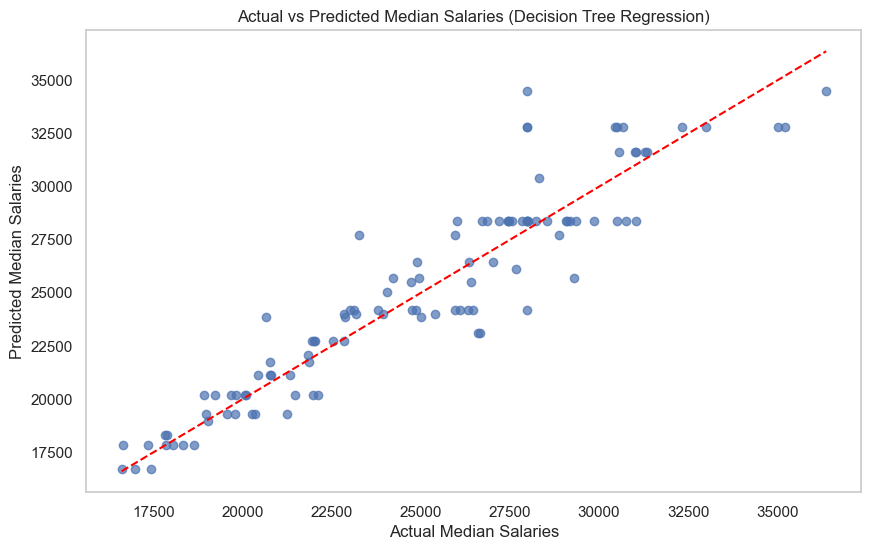

In [95]:
# Scatter plot of actual vs. predicted values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(models_performance[best_model_name]["Actual"], best_model_predictions, alpha=0.7)
plt.plot([models_performance[best_model_name]["Actual"].min(), models_performance[best_model_name]["Actual"].max()],
         [models_performance[best_model_name]["Actual"].min(), models_performance[best_model_name]["Actual"].max()],
         color='red', linestyle='--')  # Diagonal line
plt.title(f'Actual vs Predicted Median Salaries ({best_model_name})')
plt.xlabel('Actual Median Salaries')
plt.ylabel('Predicted Median Salaries')
plt.grid()
plt.show()

**Overall, this comprehensive approach not only demonstrates the effectiveness of the Linear Regression model for predicting certain values but also highlights the importance of thorough data preprocessing and evaluation in the machine learning workflow.**